# Exploratory Data Analysis (EDA) and Machine Learning (ML) Modeling on the Crop Yield dataset 

## Data loading

In [157]:
# importing the libraries and loading data
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
path = r"C:\Users\USER\Documents\A data science\MachineLearning\crop_yield.xlsx"
df = pd.read_excel(path)
df.head(2)

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,Arecanut,1997,Whole Year,Assam,73814.0,56708,2051.4,7024878.38,22882.34,0.796087
1,Arhar/Tur,1997,Kharif,Assam,6637.0,4685,2051.4,631643.29,2057.47,0.710435


## Data Exploration and cleaning

In [158]:
# explaring data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19689 entries, 0 to 19688
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Crop             19689 non-null  object 
 1   Crop_Year        19689 non-null  int64  
 2   Season           19689 non-null  object 
 3   State            19689 non-null  object 
 4   Area             19689 non-null  float64
 5   Production       19689 non-null  int64  
 6   Annual_Rainfall  19689 non-null  float64
 7   Fertilizer       19689 non-null  float64
 8   Pesticide        19689 non-null  float64
 9   Yield            19689 non-null  float64
dtypes: float64(5), int64(2), object(3)
memory usage: 1.5+ MB


In [159]:
df.describe()

,Crop_Year,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
count,19689.000000,1.968900e+04,1.968900e+04,19689.000000,1.968900e+04,1.968900e+04,19689.000000
mean,2009.127584,1.799266e+05,1.643594e+07,1437.755177,2.410331e+07,4.884835e+04,79.954009
std,6.498099,7.328287e+05,2.630568e+08,816.909589,9.494600e+07,2.132874e+05,878.306193
min,1997.000000,5.000000e-01,0.000000e+00,301.300000,5.417000e+01,9.000000e-02,0.000000
25%,2004.000000,1.390000e+03,1.393000e+03,940.700000,1.880146e+05,3.567000e+02,0.600000
50%,2010.000000,9.317000e+03,1.380400e+04,1247.600000,1.234957e+06,2.421900e+03,1.030000
75%,2015.000000,7.511200e+04,1.227180e+05,1643.700000,1.000385e+07,2.004170e+04,2.388889
max,2020.000000,5.080810e+07,6.326000e+09,6552.700000,4.835407e+09,1.575051e+07,21105.000000


In [160]:
df.columns

Index(['Crop', 'Crop_Year', 'Season', 'State', 'Area', 'Production',
       'Annual_Rainfall', 'Fertilizer', 'Pesticide', 'Yield'],
      dtype='object')

In [161]:
print("total rows: ",df.shape[0])
print("total cols: ",df.shape[1])

total rows:  19689
total cols:  10


### categorical vs numerical columns

In [162]:
cat_col = list(df.select_dtypes(include='object').columns)
print("Categorical columns - ",cat_col)
print("no of categorical columns - ", len(cat_col))

Categorical columns -  ['Crop', 'Season', 'State']
no of categorical columns -  3


In [163]:
num_col = list(df.select_dtypes(exclude='object').columns)
print("Numerical columns - ",num_col)
print("no of numerical columns - ", len(num_col))

Numerical columns -  ['Crop_Year', 'Area', 'Production', 'Annual_Rainfall', 'Fertilizer', 'Pesticide', 'Yield']
no of numerical columns -  7


### handling missing

In [164]:
df.isnull().sum()*100

Crop               0
Crop_Year          0
Season             0
State              0
Area               0
Production         0
Annual_Rainfall    0
Fertilizer         0
Pesticide          0
Yield              0
dtype: int64

In [165]:
print("Frequently used crop \n", df['Crop'].mode()[0])
print("Min and max year of the crop year dataset \n",df['Crop_Year'].min(), "and", df['Crop_Year'].max())
print("Seasons from dataset \n",list(df['Season'].unique()))
print("State from dataset \n",list(df['State'].unique()))
print("Production median \n",df['Production'].median())
print("Min and max year of the crop year dataset \n", df['Area'].min(),"and",df['Area'].max())

Frequently used crop 
 Rice
Min and max year of the crop year dataset 
 1997 and 2020
Seasons from dataset 
 ['Whole Year', 'Kharif', 'Rabi', 'Autumn', 'Summer', 'Winter']
State from dataset 
 ['Assam', 'Karnataka', 'Kerala', 'Meghalaya', 'West Bengal', 'Puducherry', 'Goa', 'Andhra Pradesh', 'Tamil Nadu', 'Odisha', 'Bihar', 'Gujarat', 'Madhya Pradesh', 'Maharashtra', 'Mizoram', 'Punjab', 'Uttar Pradesh', 'Haryana', 'Himachal Pradesh', 'Tripura', 'Nagaland', 'Chhattisgarh', 'Uttarakhand', 'Jharkhand', 'Delhi', 'Manipur', 'Jammu and Kashmir', 'Telangana', 'Arunachal Pradesh', 'Sikkim']
Production median 
 13804.0
Min and max year of the crop year dataset 
 0.5 and 50808100.0


In [166]:
print("unique value count\n",df.nunique())
print("duplicate is not present", df.duplicated().sum())

unique value count
 Crop                  55
Crop_Year             24
Season                 6
State                 30
Area               13644
Production         14016
Annual_Rainfall      634
Fertilizer         18598
Pesticide          17405
Yield              13551
dtype: int64
duplicate is not present 0


In [ ]:
# data has no missing and duplicates

## Data visualization

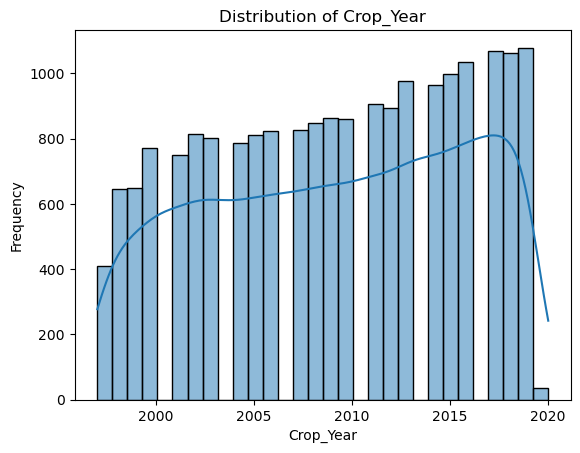

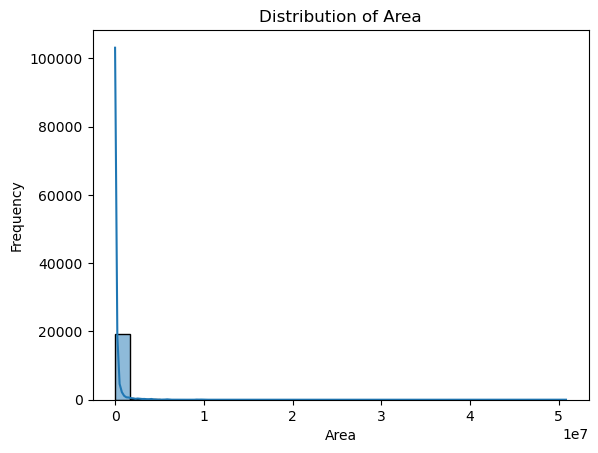

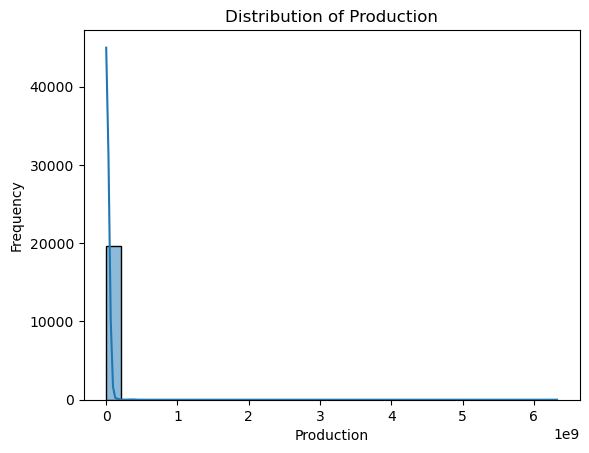

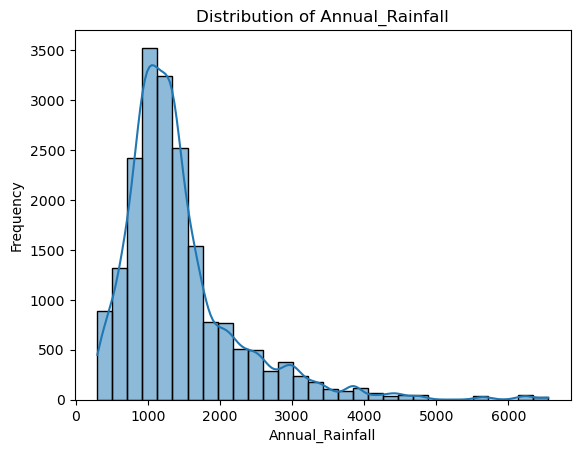

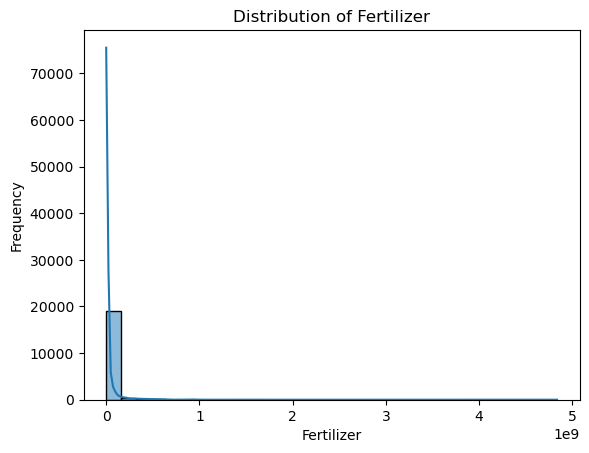

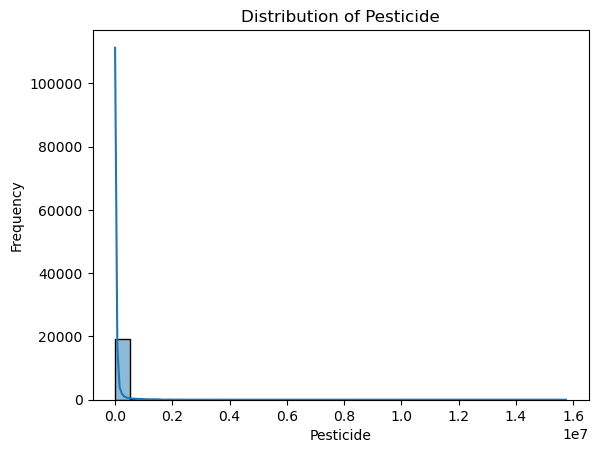

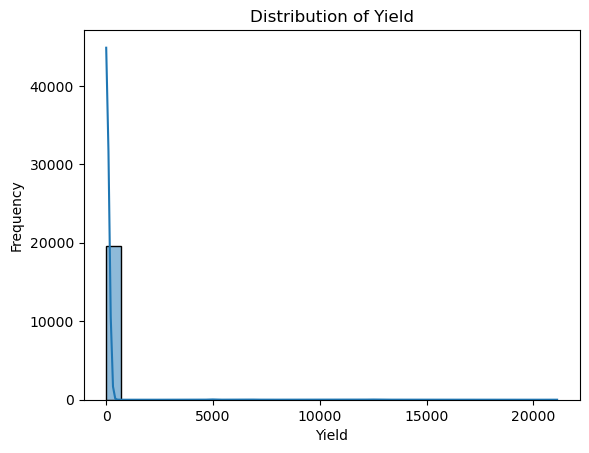

In [167]:
# distribution of numerical features like rainfall, production, and fertilizer usage  
for i in num_col:
    sns.histplot(df[i], kde=True, bins=30)
    plt.title(f'Distribution of {i}')
    plt.xlabel(i)
    plt.ylabel('Frequency')
    plt.show()

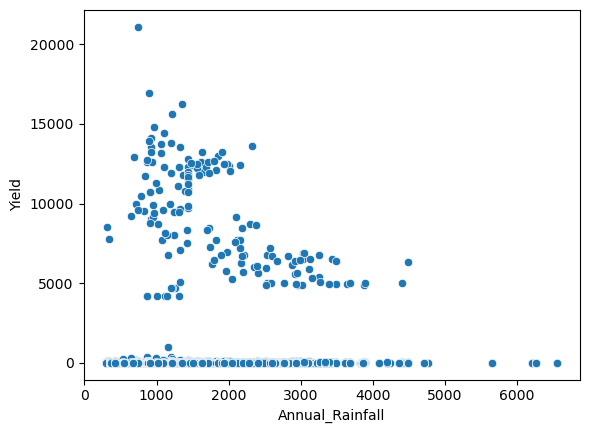

In [168]:
#  relationship between rainfall and crop yield
sns.scatterplot(data=df,x='Annual_Rainfall',y='Yield')
plt.show()

In [169]:
df[['Annual_Rainfall','Yield']].corr()
# little to no linear relationship between rainfall and yield

,Annual_Rainfall,Yield
Annual_Rainfall,1.000000,0.020761
Yield,0.020761,1.000000


In [172]:
df.corr()

C:\Users\USER\AppData\Local\Temp\ipykernel_10944\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Crop_Year,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
Crop_Year,1.000000,-0.035686,0.003366,-0.011187,0.011169,-0.004657,0.002539
Area,-0.035686,1.000000,0.037441,-0.106054,0.973255,0.973479,0.001858
Production,0.003366,0.037441,1.000000,0.029879,0.039799,0.035171,0.570809
Annual_Rainfall,-0.011187,-0.106054,0.029879,1.000000,-0.109734,-0.097657,0.020761
Fertilizer,0.011169,0.973255,0.039799,-0.109734,1.000000,0.954991,0.002862
Pesticide,-0.004657,0.973479,0.035171,-0.097657,0.954991,1.000000,0.001782
Yield,0.002539,0.001858,0.570809,0.020761,0.002862,0.001782,1.000000


<Axes: >

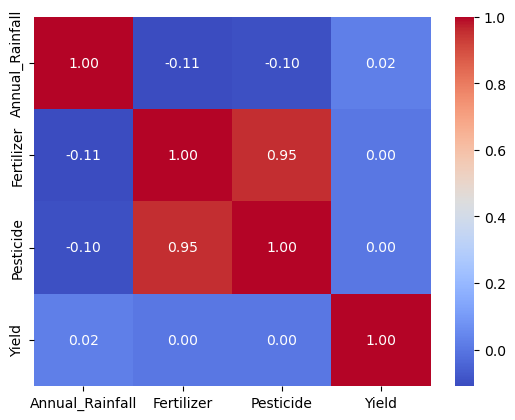

In [173]:
corrmat=df[['Annual_Rainfall', 'Fertilizer', 'Pesticide', 'Yield']].corr()
sns.heatmap(corrmat,annot=True,cmap='coolwarm',fmt=".2f")

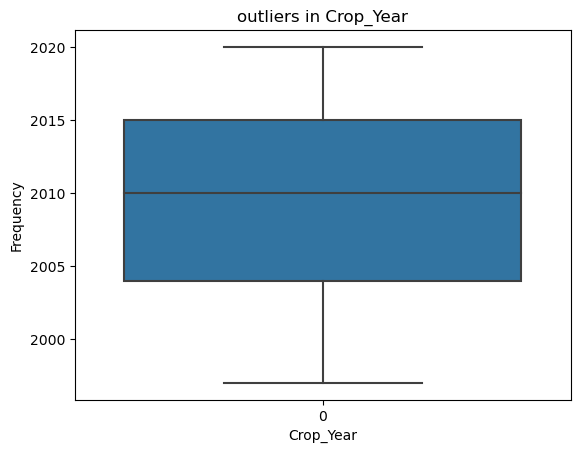

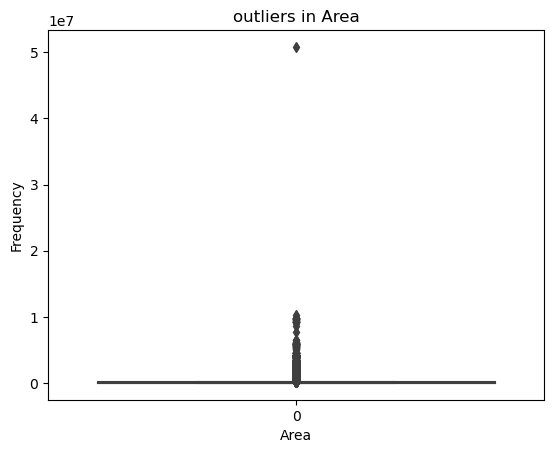

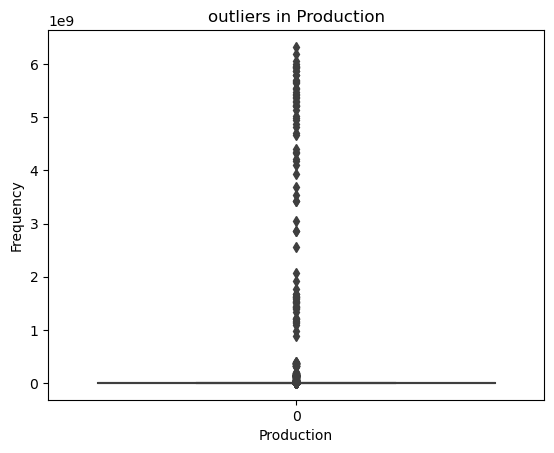

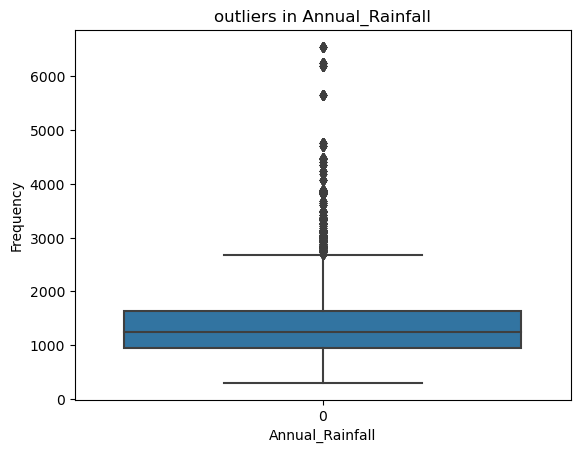

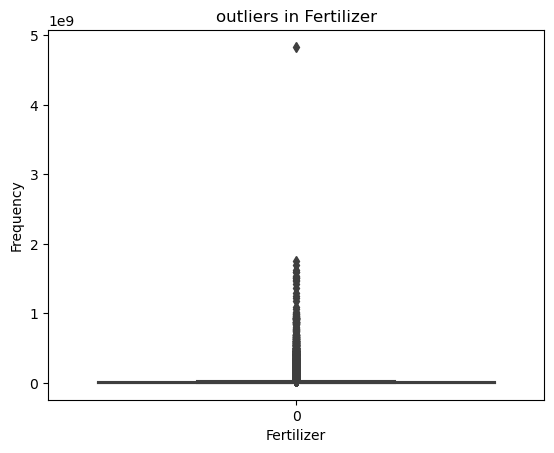

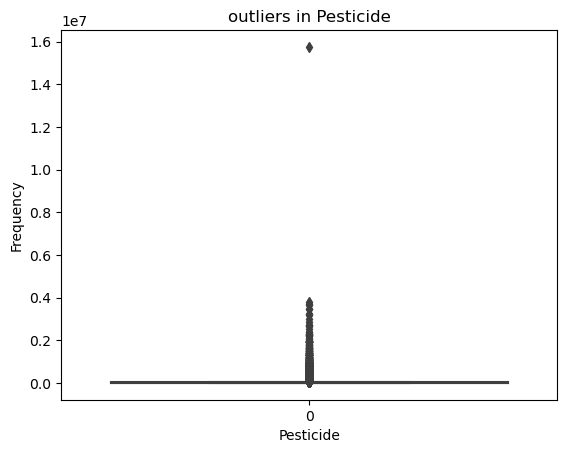

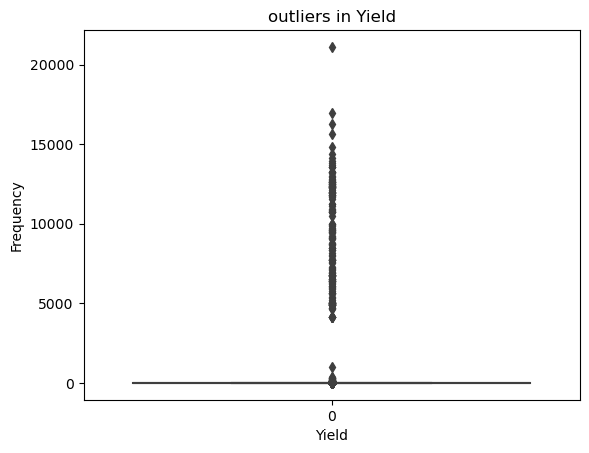

In [171]:
# detect outliers in numerical features
for i in num_col:
    sns.boxplot(df[i])
    plt.title(f'outliers in {i}')
    plt.xlabel(i)
    plt.ylabel('Frequency')
    plt.show()

## Feature Engineering & Data Preprocessing

In [174]:
# Categorical variables (Crop, Season, State) into a numerical format
df['Crop'] = df['Crop'].str.lower()
df['Season'] = df['Season'].str.lower()
df['State'] = df['State'].str.lower()

df = pd.get_dummies(df,columns=['Crop', 'Season', 'State'])
df.head(2)

,Crop_Year,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield,Crop_arecanut,Crop_arhar/tur,Crop_bajra,...,State_odisha,State_puducherry,State_punjab,State_sikkim,State_tamil nadu,State_telangana,State_tripura,State_uttar pradesh,State_uttarakhand,State_west bengal
0,1997,73814.0,56708,2051.4,7024878.38,22882.34,0.796087,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1997,6637.0,4685,2051.4,631643.29,2057.47,0.710435,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [175]:
# scale numerical variables before modeling
X = df.drop('Yield',axis=1)
Y = df['Yield']

# using RobustScaler as it handles outlier better than the standarscaler as this data has outlier which I saw in above boxplot
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X_scaled =  scaler.fit_transform(X)

In [176]:
# split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X_scaled,Y,test_size=0.2,random_state=50)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(15751, 97)
(3938, 97)
(15751,)
(3938,)


##  Model Building & Training
### using Supervised learning - As the data has non linear data, I am going with Random forest and KNN model

In [177]:
# calling and training the model 
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
rf=RandomForestRegressor()
kn=KNeighborsRegressor(n_neighbors=5)
rf.fit(x_train,y_train)
kn.fit(x_train,y_train)
print("RandomForest model training score \n", rf.score(x_train,y_train))
print("KNN model training score \n", kn.score(x_train,y_train))

RandomForest model training score 
 0.9969273790754968
KNN model training score 
 0.8588089535777008


In [178]:
# testing model
rf_pred = rf.predict(x_test)
kn_pred = kn.predict(x_test)
result = y_test.reset_index()
result['RandomForest_pred'] = rf_pred
result['KNN_pred'] = kn_pred
result.head(5)

,index,Yield,RandomForest_pred,KNN_pred
0,12191,2.680200,3.463283,3.336247
1,8279,0.753333,1.030719,0.772095
2,3065,19.247500,18.340261,17.429017
3,10693,0.958571,1.008061,0.904893
4,3471,1.361429,1.364699,1.223012


## Model Evaluation
### using R-squared, MSE, MAE, RMSE scores als using cross val score

In [179]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
print("RandomForestRegressor Evaluation score")
print("R-Squared score:", r2_score(y_test,rf_pred))
print("MSE score:", mean_absolute_error(y_test,rf_pred))
print("MSE score:", mean_squared_error(y_test,rf_pred))
print("RMSE score:", np.sqrt(mean_squared_error(y_test,rf_pred)))
print("")
print("KNeighborsRegressor Evaluation Score")
print("R-Squared (R²):", r2_score(y_test, kn_pred))
print("MAE (Mean Absolute Error):", mean_absolute_error(y_test, kn_pred))
print("MSE (Mean Squared Error):", mean_squared_error(y_test, kn_pred))
print("RMSE (Root Mean Squared Error):", np.sqrt(mean_squared_error(y_test, kn_pred)))

RandomForestRegressor Evaluation score
R-Squared score: 0.979848615125357
MSE score: 7.28296787130976
MSE score: 14645.274504399962
RMSE score: 121.01766195229506

KNeighborsRegressor Evaluation Score
R-Squared (R²): 0.7949714795235676
MAE (Mean Absolute Error): 30.57921629330397
MSE (Mean Squared Error): 149007.0772945596
RMSE (Root Mean Squared Error): 386.01434856046427


In [181]:
kn_cv=cross_val_score(kn,X_scaled,Y,cv=kf,scoring="r2")
print("RandomForestRegressor cross val score: ", rf_cv)
print("RandomForestRegressor mean: ", rf_cv.mean())
print("RandomForestRegressor variance: ", rf_cv.var())
print("")
print("KNeighborsRegressor cross val score: ", kn_cv)
print("KNeighborsRegressor mean: ", kn_cv.mean())
print("RandomForestRegressor variance: ", rf_cv.var())

RandomForestRegressor cross val score:  [0.97820168 0.99152665 0.95259645 0.98953399 0.98567945]
RandomForestRegressor mean:  0.979507644468644
RandomForestRegressor variance:  0.00020179867492133423

KNeighborsRegressor cross val score:  [0.79497148 0.82508122 0.67633136 0.75135853 0.8070902 ]
KNeighborsRegressor mean:  0.7709665571874551
RandomForestRegressor variance:  0.00020179867492133423


### Findings

- No missing values or duplicate records were found in the dataset.
- The dataset contains both **categorical features** (`Crop`, `State`, `Season`) and **numerical features** (`Area`, `Production`, `Annual Rainfall`, `Fertilizer`, `Pesticide`, `Yield`).
- The most frequently grown crop is **rice**, and the crop year ranges from **1997 to 2015**.
- **Annual Rainfall and Yield show a very low correlation (~0.02)**, indicating that rainfall alone does not significantly influence crop yield.
- **Fertilizer and Pesticide usage have very low correlation with Yield** (~0.0029 and ~0.0018 respectively), suggesting they **do not strongly impact productivity on their own**.
- **Fertilizer and Pesticide** are **highly correlated with each other and with Area**, indicating that input usage scales with farm size.
- **Production and Yield** have a **moderate positive correlation (~0.57)**, implying that yield improvements contribute meaningfully to increased overall production.
- **Outliers** were observed in numerical features such as `Area`, `Production`, `Fertilizer`, and `Pesticide`, identified through boxplots.
- Categorical variables were encoded using **One-Hot Encoding** after converting to lowercase for consistency.
- Numerical features were scaled using **RobustScaler**, which is more effective in handling outliers than `StandardScaler` or `MinMaxScaler`.
- The dataset was split into **training and testing sets (80:20 ratio)**.
- Two supervised machine learning models were applied:
  - `RandomForestRegressor`
  - `KNeighborsRegressor`
- **RandomForestRegressor** performed better on both training and testing sets with **higher R² scores** and **lower MAE, MSE, and RMSE** values.
- `KNeighborsRegressor` was more sensitive to outliers and showed relatively lower accuracy.
- **Cross-validation using K-Fold (n=5)** showed that **Random Forest** had a more consistent and higher average R² score compared to KNN.
- **Conclusion:** Based on evaluation metrics and cross-validation, **RandomForestRegressor is the recommended model** for crop yield prediction.


### Insights & Recommendations

#### Key Factors Impacting Crop Yield:

- **Fertilizer and Pesticide** show **very weak correlation with yield**, suggesting input usage does not directly drive productivity and may require **optimization**.
- **Annual Rainfall** has low correlation with yield, indicating it's not a standalone predictor of crop performance.
- **Production** correlates moderately with yield, supporting efforts to improve per-unit-area output.
- **Crop type, season, and state** are likely influential due to **regional agro-climatic differences and crop-specific practices**.

#### Suggestions:

- Optimize **input efficiency** by tailoring fertilizer and pesticide usage to specific **crop types, soil profiles, and historical yield data**.
- Use **seasonal trends** and past performance to refine **planting and harvesting strategies**.
- Incorporate **region-specific practices** based on insights from high-yield areas.
- Adopt **data-driven decision-making frameworks** to monitor crop input-output dynamics and continually refine agricultural strategies.
